In [1]:
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append("/kaggle/src/")

from data._dataloader import SegDataset
from conf import ExpConfig

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/working/train_512_512.csv
4556


(512, 512, 3)


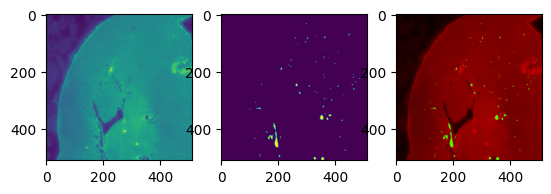

(512, 512, 3)


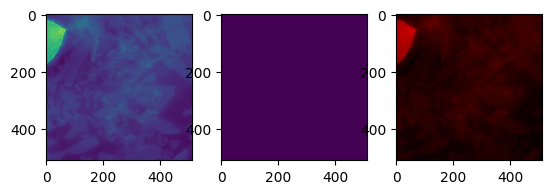

(512, 512, 3)


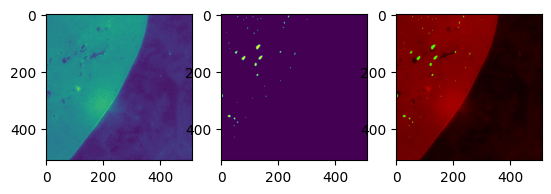

(512, 512, 3)


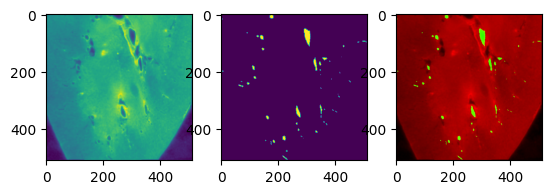

In [3]:
config = ExpConfig()
train_df_path = os.path.join(
    config.output_dir,
    f"{config.phase}_{config.stride_height}_{config.stride_width}.csv",
)
print(train_df_path)
df = pd.read_csv(train_df_path)
df = df[df["data_name"]=="kidney_1_dense"]
print(len(df))
dataset = SegDataset(df, config, phase="train")
dataloader = DataLoader(
    dataset,
    batch_size=4,
    num_workers=config.num_workers,
    shuffle=True,
    pin_memory=True,
)

for idx, (image, mask) in enumerate(dataloader):
    # print(idx)
    if torch.isnan(image).any():
        print("nan")
        print(image)
        raise ValueError
    for batch in range(image.shape[0]):
        image_mask = image[batch].numpy().copy()
        image_mask = (image_mask - image_mask.min()) / (image_mask.max() - image_mask.min())
        image_mask = np.concatenate([
                    np.expand_dims(image_mask[0], axis=-1), 
                    np.expand_dims(mask[batch][0].numpy(), axis=-1),
                    np.zeros_like(np.expand_dims(image_mask[0], axis=-1))
        ], axis=-1)
        # print(image[batch])
        if image[batch] is np.nan:
            print("nan")
            
        if idx == 0:
            print(image_mask.shape)
            plt.figure()
            plt.subplot(1,3,1)
            plt.imshow(image[batch,0,:,:])
            plt.subplot(1,3,2)
            plt.imshow(mask[batch,0,:,:])
            plt.subplot(1,3,3)
            plt.imshow(image_mask)
            plt.show()

   


/kaggle/working/valid_512_512.csv
4556


0
0
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.3489, 0.3447, 0.3404,  ..., 0.3553, 0.3532, 0.3489],
        [0.3489, 0.3447, 0.3404,  ..., 0.3489, 0.3532, 0.3489],
        [0.3447, 0.3447, 0.3426,  ..., 0.3489, 0.3468, 0.3511],
        ...,
        [0.2489, 0.2489, 0.2489,  ..., 0.2574, 0.2617, 0.2532],
        [0.2489, 0.2489, 0.2447,  ..., 0.2532, 0.2574, 0.2553],
        [0.2489, 0.2489, 0.2447,  ..., 0.2532, 0.2532, 0.2553]])
(512, 512, 3)


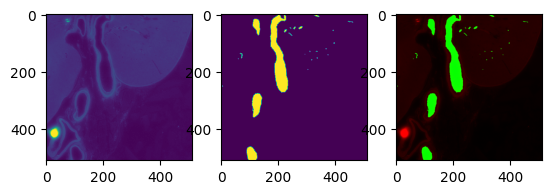

1
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.3377, 0.3377, 0.3363,  ..., 0.3488, 0.3452, 0.3516],
        [0.3377, 0.3377, 0.3363,  ..., 0.3488, 0.3452, 0.3516],
        [0.3378, 0.3378, 0.3159,  ..., 0.3496, 0.3495, 0.3487],
        ...,
        [0.3534, 0.3534, 0.3540,  ..., 0.2541, 0.2535, 0.2618],
        [0.3572, 0.3572, 0.3497,  ..., 0.2522, 0.2548, 0.2605],
        [0.3561, 0.3561, 0.3480,  ..., 0.2537, 0.2570, 0.2596]])
(512, 512, 3)


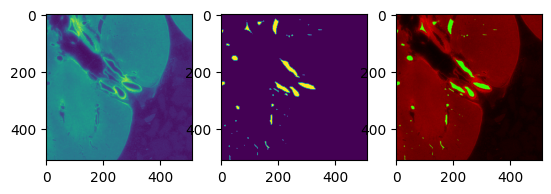

2
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.4472, 0.4432, 0.4432,  ..., 0.4552, 0.4672, 0.4712],
        [0.4392, 0.4432, 0.4432,  ..., 0.4592, 0.4632, 0.4632],
        [0.4392, 0.4432, 0.4432,  ..., 0.4632, 0.4592, 0.4632],
        ...,
        [0.4472, 0.4472, 0.4592,  ..., 0.3672, 0.3672, 0.3712],
        [0.4512, 0.4432, 0.4592,  ..., 0.3672, 0.3672, 0.3672],
        [0.4512, 0.4432, 0.4512,  ..., 0.3672, 0.3632, 0.3672]])
(512, 512, 3)


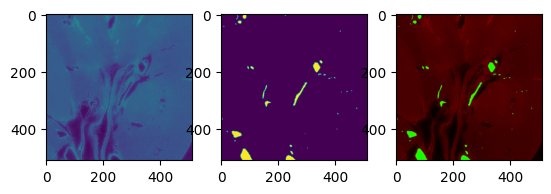

3
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.3528, 0.3528, 0.3447,  ..., 0.3513, 0.3543, 0.3642],
        [0.3528, 0.3528, 0.3447,  ..., 0.3513, 0.3543, 0.3642],
        [0.3476, 0.3476, 0.3428,  ..., 0.3552, 0.3580, 0.3636],
        ...,
        [0.2672, 0.2672, 0.2657,  ..., 0.2761, 0.2683, 0.2730],
        [0.2649, 0.2649, 0.2639,  ..., 0.2783, 0.2777, 0.2774],
        [0.2650, 0.2650, 0.2658,  ..., 0.2771, 0.2809, 0.2809]])
(512, 512, 3)


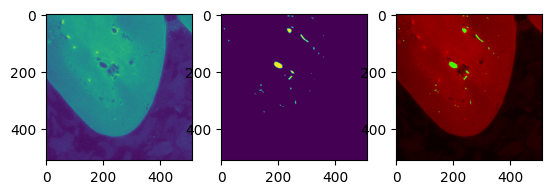

In [4]:
train_df_path = os.path.join(
    config.output_dir,
    f"valid_{config.stride_height}_{config.stride_width}.csv",
)
print(train_df_path)
df = pd.read_csv(train_df_path)
df = df[df["data_name"]=="kidney_1_dense"]
print(len(df))

dataset = SegDataset(df, config)
dataloader = DataLoader(
    dataset,
    batch_size=4,
    num_workers=config.num_workers,
    shuffle=True,
    pin_memory=True,
)

for idx, (image, mask) in enumerate(dataloader):
    print(idx)
    for batch in range(image.shape[0]):
        print(batch)
        print(image[batch].shape)
        print(mask[batch].shape)
        image_mask = image[batch].numpy().copy()
        image_mask = (image_mask - image_mask.min()) / (image_mask.max() - image_mask.min())
        image_mask = np.concatenate([
                    np.expand_dims(image_mask[0], axis=-1), 
                    np.expand_dims(mask[batch][0].numpy(), axis=-1),
                    np.zeros_like(np.expand_dims(image_mask[0], axis=-1))
        ], axis=-1)
        print(image[batch,0])
        print(image_mask.shape)
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(image[batch,0,:,:])
        plt.subplot(1,3,2)
        plt.imshow(mask[batch,0,:,:])
        plt.subplot(1,3,3)
        plt.imshow(image_mask)
        plt.show()

    break

